In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


C:\Users\fls21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8930 - loss: 0.3344 - val_accuracy: 0.9865 - val_loss: 0.0446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9916 - val_loss: 0.0265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9911 - val_loss: 0.0324


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


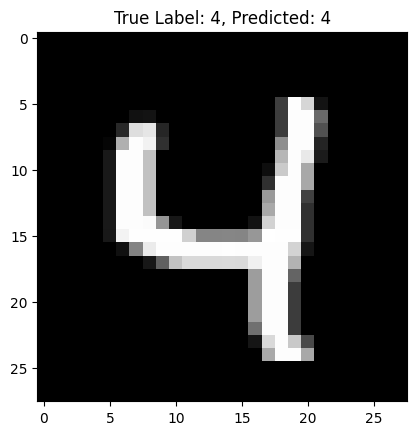

True Label: 4
Predicted Label: 4


In [9]:
import numpy as np
import matplotlib.pyplot as plt

random_idx = np.random.randint(0, len(x_test))
random_image = x_test[random_idx]
true_label = y_test[random_idx]

predicted_label = model.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(predicted_label)

plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted: {predicted_class}")
plt.show()

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_class}")